# CMSC478 Machine Learning - Spring 2021

## Instructor: Fereydoon Vafaei

## Assignment-5: Image Classification with Convolutional Neural Networks

*Caleb M. McLaren, CU01417* 

## Overview and Learning Objectives

In Assignment-5, you're going to perform image classification using Convolutional Neural Networks in Tensorflow and Keras.

Pedagogically, this assignment will help you:
- better understand how CNNs are built and applied on ML/CV tasks specifically for image classification.
- practice CNN implementation using Tensorflow 2 and Keras.
- practice Transfer Learning using pretrained models.

**NO LATE PERIOD:** Assignment-5 has NO late period, i.e. late submissions will NOT be accepted. Read the instructions and grading rubric carefully. Building and training CNNs are time-consuming tasks. **You're strongly recommended to get started on A5 as soon as possible!**

**Training Requirement**: Submissions with no training and history plots will get ZERO, NO EXCEPTION! CNN architectures and tf/keras codes will get no points if you do not actually train and test them and plot their train history. **Your submitted notebook should clearly include ALL the training logs as well as the history plots; otherwise you get zero for A5.**

<b>Course Policy Reminder</b>
Debugging the codes and error resolution are always the students' responsbility. This policy will be enforced in email communications and the office hours. Keep in mind that all assignments are individual graded tasks. Any collaboration with other students is strictly prohibited and is considered as cheating. Students should NOT share any answer, solution, or code with other students. Violations of these policies would be penalized according to UMBC academic integrity policy.

Follow the instructions for each step very carefully.

Wherever needed, you should replace `...` elipsis with your code.

### Import Cell

All imports should be included in this import cell.

In [34]:
''' Import Cell
    Import necessary Python/Sklearn modules as well as Tensorflow/Keras '''

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, utils
from tensorflow.keras.models import Model


from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input
#decode_prediction

In [3]:
print("tf Version: ", tf.__version__)

tf Version:  2.4.1


## Part-I [20 Points] - CIFAR-10 Baseline Model

You're going to build a CNN image classifier for [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. Since it's one of the built-in datasets in keras, it will be downloaded and loaded automatically using the following provided code.

In [4]:
# Load CIFAR10 data 
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


> The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

### Preprocessing

To help you focus on training CNNs, the preprocessing steps are provided.

In [5]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

> You should one-hot encode the image classes/labels using [`to_categorical()` method](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical).

In [6]:
# one hot encode target values/labels
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

> Notice how label vetor shapes changed after one-hot encoding.

In [7]:
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [8]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


> You can visualize some sample images.

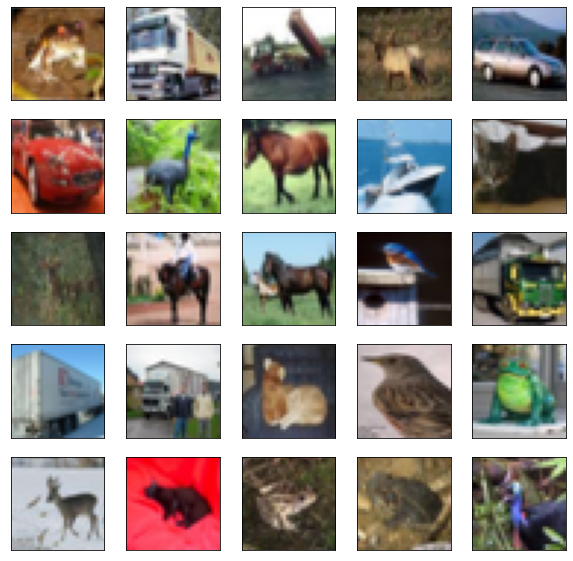

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)

### Building the Baseline CNN for Image Classification of CIFAR-10

Using the CNN model in the [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/images/cnn), build a `baseline_model` that can achieve a minimum required test accuracy of 0.70 (evaluated on the test set). 

To build the `baseline_model`, you may or may not make changes to the model that you see in the tutorial, but the `baseline_model` would use a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

**Test Accuracy Requirement:** The `baseline_model` must achieve at least 0.70 accuracy on CIFAR-10 test images. 

In [10]:
''' baseline_model based on: https://www.tensorflow.org/tutorials/images/cnn '''

baseline_model = models.Sequential()
baseline_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) #32 - 3 +1 = 30
baseline_model.add(layers.MaxPooling2D((2, 2))) 
baseline_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
baseline_model.add(layers.MaxPooling2D((2, 2)))
baseline_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
baseline_model.add(layers.Flatten())
baseline_model.add(layers.Dense(64, activation='relu'))
baseline_model.add(layers.Dense(10, activation='softmax'))

**Hints**:

> You may make changes to the model that you see in the tutorial. Notice how the output shape changes after each layer in the tutorial model and the `baseline_model` summary below.

> Your `baseline_model` does NOT have to macth with the summary below as long as it satisfies the minimum test accuracy requirement of 0.70.

> Note that since you are working with image data, you should use a `Flatten()` layer BEFORE the `Dense` layers as you can see in the tutorial model and the summary below.

> Also note that the output layer specifications (number of neurons and activation function) are determined by the ML task, i.e. 10-class classification.

In [11]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

> Be careful to use the correct loss function and metric for classification task with one-hot encoded labels when you compile the model.

In [12]:
''' compile baseline_model with optimizer and learning rate of your choice (you may tune them)
    be careful about the loss and metric'''
opt = keras.optimizers.Adam(learning_rate=0.0000000001)
opt1 = keras.optimizers.Adam()
myLoss = keras.losses.CategoricalCrossentropy()
met = keras.metrics.CategoricalCrossentropy()
met2 = "accuracy"

baseline_model.compile(optimizer=opt1, loss=myLoss, metrics=[met2])

> Train the `baseline_model` with 10 epochs only, and then plot the train history.

In [13]:
''' train the baseline_model on X_train, y_train with 10 epochs
    validation_data is X_test, y_test or you can specify validation_split '''

history_baseline = baseline_model.fit(X_train, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1407/1407 [==============================] - 24s 16ms/step - loss: 1.8106 - accuracy: 0.3222 - val_loss: 1.2295 - val_accuracy: 0.5696
Epoch 2/10
1407/1407 [==============================] - 23s 16ms/step - loss: 1.2310 - accuracy: 0.5658 - val_loss: 1.1206 - val_accuracy: 0.6050
Epoch 3/10
1407/1407 [==============================] - 23s 16ms/step - loss: 1.0356 - accuracy: 0.6368 - val_loss: 0.9827 - val_accuracy: 0.6554
Epoch 4/10
1407/1407 [==============================] - 23s 16ms/step - loss: 0.9470 - accuracy: 0.6651 - val_loss: 0.9907 - val_accuracy: 0.6458
Epoch 5/10
1407/1407 [==============================] - 22s 16ms/step - loss: 0.8755 - accuracy: 0.6926 - val_loss: 0.9657 - val_accuracy: 0.6702
Epoch 6/10
1407/1407 [==============================] - 23s 16ms/step - loss: 0.8103 - accuracy: 0.7158 - val_loss: 0.8949 - val_accuracy: 0.6918
Epoch 7/10
1407/1407 [==============================] - 23s 16ms/step - loss: 0.7556 - accuracy: 0.7330 - val_loss: 0.8693 -

In [15]:
print(history_baseline.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


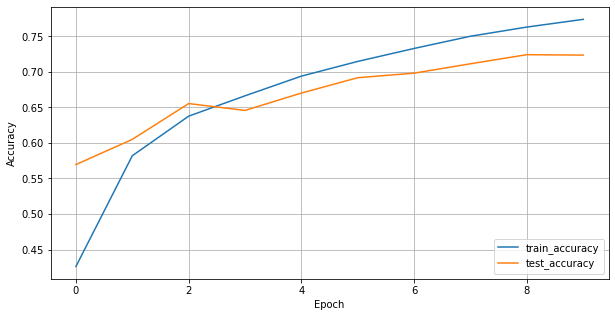

In [16]:
''' plot the history with figsize=(10,5)
    the plot should display the grid and the whole range of values for epoch and accuracy
    the plot should have axis labels and legend location should be lower right 
    https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/'''


plt.figure(figsize=(10,5))
plt.grid(True)

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history_baseline.history['accuracy'])
plt.plot(history_baseline.history['val_accuracy'])
plt.legend(['train_accuracy', 'test_accuracy'], loc='lower right')
plt.show()

> The training plot clearly shows a gap between the train accuracy and validation accuracy which is an indication of **overfitting**.

> Now, evaluate the baseline model on test images.

> **Test Accuracy Requirement:** The `baseline_model` must achieve at least 0.70 test accuracy on CIFAR-10 test images.

> Since you used test set `X_test` and `y_test` as the validation set, the results of running `evaluate()` method on `(X_test, y_test)` should match with the validation accuracy that you observed after the last epoch of training.

In [17]:
# Evaluate the baseline_model on the test set
baseline_test_loss, baseline_test_acc = baseline_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8704 - accuracy: 0.7103


In [18]:
round(baseline_test_acc, 2)

0.71

## Part-II [40 Points] Transfer Learning with Pretrained Keras Models

In Part-II, you're going to perform **Transfer Learning** using CNN architectures in [Keras Applications](https://keras.io/api/applications/) pretrained on [ImageNet](https://www.image-net.org/) dataset.

As discussed in DNN and CNN lectures, by **Transfer Learning** you can use the lower layers of the models that are already pretrained on some famous datasets like [ImageNet](https://www.image-net.org/) dataset. For this problem, you're going to use a CNN architecture that you choose from the set of pretrained models in Keras such as `DenseNet121` or `ResNet50`. You can use any of the models listed in [Keras Applications](https://keras.io/api/applications/) although some models like `InceptionV3` may have image size limitations that do not fit with this dataset.

Read the slides and the textbook examples as well as [Keras Documentation Usage Examples](https://keras.io/api/applications/#usage-examples-for-image-classification-models) to learn how to use CNNs pretrained on `'imagenet'`.

> **Note**: Read the documentations and the code examples very carefully. 

> **Test Accuracy Requirement:** The `transfer_model` must achieve at least 0.65 test accuracy on CIFAR-10 test images.

> The goal of Part-II is helping students learn how to do trannsfer learning in practice, so don't worry that 0.65 is less than the `baseline_model` test accuracy 0.70. In fact, transfer learning is quite effective but would require more tuning and experiments, and you may choose to improve your transfer learning model to satisfy the requirements of your `final_model` in Part-III.

> The first step in transfer learning is getting the lower layers of one of the pretrained models from `keras.applications`. You should set the `weights='imagenet'` and `include_top=False` to use lower layers only. You should also use `'max'` pooling. Be careful to set the `input_shape` correctly.

In [100]:
#https://www.tensorflow.org/api_docs/python/tf/keras/applications/DenseNet121
#no need for preprocess_input since we have already normalized pixel data to between 0 & 1. 
# Trying to solve overfitting - use input_tensor? 
transfer = tf.keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(32, 32, 3),
    pooling='max',
    classes=10,
)

In [101]:
net = transfer.output

> Now add the top layers, i.e. `Flatten` and `Dense` layers including the output layer. Be very careful about the specifications of the output layer.

> Note that in this step you add layers using functional API. See, for instance, how `(net)` comes after `Flatten()` and `Dense()` in each step.

In [104]:
''' add the top layers, i.e. Flatten and Dense layers including the output layer '''
net = layers.Flatten()(net)
net = layers.Dense(1024, activation='relu')(net) # Dense Layer
net = layers.Dropout(0.2)(net)
net = layers.Dense(180, activation='relu')(net) # Dense Layer
net = layers.Dropout(0.1)(net)
net = layers.Dense(180, activation='relu')(net)
net = layers.Dropout(0.1)(net)
net = layers.Dense(60, activation='relu')(net)
# Add as many Dense layers as needed

...
output = layers.Dense(10, activation='softmax')(net) # Output layer for 10-class classification

In [105]:
''' Build transfer_model
    see the examples and determine how you should pass the arguments of the Model(...) 
    https://keras.io/api/applications/#usage-examples-for-image-classification-models '''

transfer_model = Model(inputs=transfer.input, outputs=output)

In [106]:
transfer_model.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_8 (ZeroPadding2D (None, 38, 38, 3)    0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d_8[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
___________________________________________________________________________________________

In [107]:
# Make the transfer layers non-trainable
#https://keras.io/api/applications/#usage-examples-for-image-classification-models
for layer in transfer.layers:
    layer.trainable = False


In [108]:
for layer in transfer_model.layers: 
    print(layer.name, layer.trainable_weights)

input_5 []
zero_padding2d_8 []
conv1/conv []
conv1/bn []
conv1/relu []
zero_padding2d_9 []
pool1 []
conv2_block1_0_bn []
conv2_block1_0_relu []
conv2_block1_1_conv []
conv2_block1_1_bn []
conv2_block1_1_relu []
conv2_block1_2_conv []
conv2_block1_concat []
conv2_block2_0_bn []
conv2_block2_0_relu []
conv2_block2_1_conv []
conv2_block2_1_bn []
conv2_block2_1_relu []
conv2_block2_2_conv []
conv2_block2_concat []
conv2_block3_0_bn []
conv2_block3_0_relu []
conv2_block3_1_conv []
conv2_block3_1_bn []
conv2_block3_1_relu []
conv2_block3_2_conv []
conv2_block3_concat []
conv2_block4_0_bn []
conv2_block4_0_relu []
conv2_block4_1_conv []
conv2_block4_1_bn []
conv2_block4_1_relu []
conv2_block4_2_conv []
conv2_block4_concat []
conv2_block5_0_bn []
conv2_block5_0_relu []
conv2_block5_1_conv []
conv2_block5_1_bn []
conv2_block5_1_relu []
conv2_block5_2_conv []
conv2_block5_concat []
conv2_block6_0_bn []
conv2_block6_0_relu []
conv2_block6_1_conv []
conv2_block6_1_bn []
conv2_block6_1_relu []
conv

In [109]:
''' compile transfer_model with optimizer and learning rate of your choice (you may tune them) '''
myOpt = keras.optimizers.Adam(learning_rate=0.00001)
myLoss = keras.losses.CategoricalCrossentropy()
met2 = "accuracy"
transfer_model.compile(optimizer=myOpt, loss=myLoss, metrics=[met2])

> **Note**: Training `DenseNet121` or `ResNet50` and other pretrained models may take a long time as they are more complex than the `baseline_model` with lots of parameters, although the fact that you've made the transfer layers' parameters non-trainable would help with reducing the training time to some degree.

In [110]:
''' train transfer_model on X_train, y_train with at least 20 epochs 
    you may train with more epochs if needed '''

history_transfer = transfer_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 139s 84ms/step - loss: 2.2078 - accuracy: 0.1906 - val_loss: 1.6493 - val_accuracy: 0.4483
Epoch 2/30
1563/1563 [==============================] - 128s 82ms/step - loss: 1.6867 - accuracy: 0.4095 - val_loss: 1.4200 - val_accuracy: 0.5085
Epoch 3/30
1563/1563 [==============================] - 128s 82ms/step - loss: 1.5167 - accuracy: 0.4705 - val_loss: 1.3220 - val_accuracy: 0.5399
Epoch 4/30
1563/1563 [==============================] - 127s 81ms/step - loss: 1.4183 - accuracy: 0.5013 - val_loss: 1.2622 - val_accuracy: 0.5614
Epoch 5/30
1563/1563 [==============================] - 128s 82ms/step - loss: 1.3445 - accuracy: 0.5266 - val_loss: 1.2252 - val_accuracy: 0.5715
Epoch 6/30
1563/1563 [==============================] - 128s 82ms/step - loss: 1.3048 - accuracy: 0.5425 - val_loss: 1.1928 - val_accuracy: 0.5862
Epoch 7/30
1563/1563 [==============================] - 127s 81ms/step - loss: 1.2691 - accuracy: 0.5522 - val_loss: 1

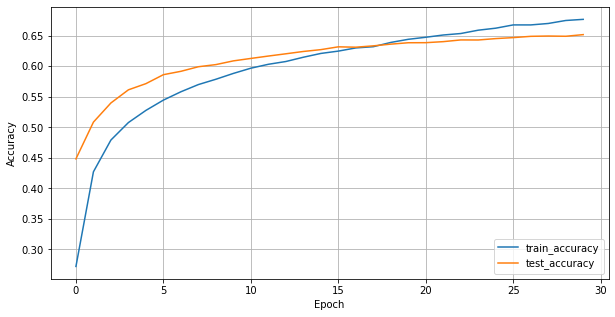

In [111]:
''' plot the history with figsize=(10,5)
    the plot should display the grid and the whole range of values for loss and accuracy
    the plot should have axis labels and legend location should be lower right '''

plt.figure(figsize=(10,5))
plt.grid(True)

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history_transfer.history['accuracy'])
plt.plot(history_transfer.history['val_accuracy'])
plt.legend(['train_accuracy', 'test_accuracy'], loc='lower right')
plt.show()

> **Test Accuracy Requirement:** The `transfer_model` must achieve at least 0.65 test accuracy on CIFAR-10 test images.

In [112]:
# Evaluate the transfer_model on the test set
transfer_test_loss, transfer_test_acc = transfer_model.evaluate(X_test, y_test)

313/313 [==============================] - 20s 64ms/step - loss: 0.9967 - accuracy: 0.6518


In [113]:
round(transfer_test_acc, 2)

0.65

## Part-III [40 Points] - Final Model

In Part-III, you're going to improve the CNN models that you built in Part-I and Part-II to achieve the minimum required test accuracy of 0.80 and higher as evaluated on the test set. Your grade for Part-III is proportinate to your test accuracy, the higher your accuracy, the higher your grade.

- **Training Requirement:** You must train all of your models and generate the history plots. Use "Save and Checkpoint" at the top menu of the Jupyter Notebook to save your outputs and plots before submission because if your submitted notebook does not show the training and the histroty plots, you get zero for this assignment.


- **Test Accuracy Requirement**: For your final model, the minimum required test accuracy on the test images of CIFAR-10 is 0.80. Anything below 0.80 will get zero for Part-III. For 0.80+ accuracies, your grade for Part-III is calculated as follows:

- Part-III grade:
    * Test accuracy of the final model < 0.80 --> Part-III grade: zero
    * 0.80 <= Test accuracy < 0.85 --> Part-III grade: 30 points
    * 0.85 <= Test accuracy --> Part-III grade: 40 points

> For example, if your test accuracy (evaluated on the test set) is 0.81, your Part-III grade will be 30. If you get a test accuracy of 0.85 and above, you get the full 40 points for Part-III.

- See "Grading" for further information on how A5 is graded.

### Tips for Improving CNN Using Regularization, Data Augmentation and Other Techniques

For the final CNN model, you may use and improve either the `baseline_model` or `transfer_model`, or any other model that you think may work better. You may search for external solutions but you must cite them properly (see **References** section for instructions on proper citation).

Some techniques that might be helpful to improve the baseline model is listed below, but you can try any other technique that you think might be helpful to improve your model.

- Regularization using [Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)

- Initialization Methods such as He 

- [Batch Normalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization)

- Data Augmentation using [Tensorflow ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) --- There are some code examples for Data Augmentation in CNN slides.

- Learning Rate Scheduling

- Any other techniques and implementations of your choice

You may also search for solutions online and borrow them with proper citation. See "References" for further information on how to properly cite any resource you may use.

You certainly need to fine-tune your model, but some helpful strategies to start with are as follows:


- You may need to add more Conv2D and MaxPooling2D layers, but don't add too many layers initially, increase your model complexity gradually. 


- Start with short training sessions with 20-50 epochs until you see some progress. Once you hit 0.80 accuracy and secured your 30 score for Part-III, you may run for longer training sessions to increase your score. To get 0.80+, you may need to run training for at least 100 epochs or use callback and early stopping to determine optimal number of epochs. For higher accuracies, you may need to run training up to ~400-500 epochs with no intervention, but keep in mind that it may take a long time, so it would be rational to first aim for the minimum required test accuracy of 0.80 with fewer number of epochs like 20 to 50 and then increase accordingly.


- You may initially use a learning rate of 0.001 and Adam, RMSProp or SGD as the optimizer. You may want to tune the learning rate and/or try learning rate scheduling methods.


- Check the progress in the training log of the baseline model and see how the accuracy improves. Similarly, you should watch the progress of your CNN during training, and if you don't see any progress in reducing loss and increasing accuracy, stop training and make any necessary changes. Don't wait for too long if you don't see any progress at all in the first epochs because that's a red flag that something is not right in your model, and you should fix any possible problem first. It's fine though if the improvements in each epoch are small, that's how CNNs learn!

In [115]:
''' Build a CNN using Conv2D and MaxPooling2D,
    as well as any other regularization technique such as Dropout, Batch Normalization, Data Augmentation,
    or any other technique you learned or are interested to try in training DNNs and CNNs.
    
    You may use Transfer Learning and/or you may use models that you find in external resources.

    NOTE: If you borrow code from any extrenal resource, 
    you must document your code by understandable and easy-to-follow comments for each cell/block. '''



final_model = tf.keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(32, 32, 3),
    pooling='max',
    classes=10,
)


In [117]:
web = final_model.output


In [119]:
web = layers.Flatten()(web)
web = layers.Dense(1024, activation='relu')(web) # Dense Layer
web = layers.Dense(180, activation='relu')(web) # Dense Layer
web = layers.Dense(180, activation='relu')(web)
web = layers.Dense(60, activation='relu')(web)
finale = layers.Dense(10, activation='softmax')(web)

final_model = Model(inputs=final_model.input, outputs=finale)

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'") at layer "zero_padding2d_8". The following previous layers were accessed without issue: []

In [ ]:
# Compile your final_model
myOpt = keras.optimizers.Adam(learning_rate=0.001)
myLoss = keras.losses.CategoricalCrossentropy()
met2 = "accuracy"
final_model.compile(optimizer=myOpt, loss=myLoss, metrics=[met2])

In [ ]:
''' use Data Augmentation if needed --- you may see examples in CNN slides/textbook
    to use data augmentation, you should use ImageDataGenerator()
    
    note that if you use data augmentation, you would then need to use .fit_generator() method for training '''

# datagen = ImageDataGenerator(...) # complete this cell only if you want to use data augmentation
# You should also use flow and steps properly
...

> **Training Requirement**: Submissions with no training and history plots will get ZERO, NO EXCEPTION! CNN architectures and tf/keras codes will get no points if you do not actually train and test them and plot their train history. **Your submitted notebook should clearly include ALL the training logs as well as the history plots; otherwise you get zero for A5.**

In [ ]:
# Train your final_model
history_final = final_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

In [ ]:
''' plot the history with figsize=(10,5)
    the plot should display the grid and the whole range of values for loss and accuracy
    the plot should have axis labels and legend location should be lower right '''

plt.figure(figsize=(10,5))
plt.grid(True)

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history_transfer.history['accuracy'])
plt.plot(history_transfer.history['val_accuracy'])
plt.legend(['train_accuracy', 'test_accuracy'], loc='lower right')
plt.show()

> The history plot not only indicates that there is no overfitting observed in 200 epochs due to the usage of regularization techniques, but also shows that we could possibly achieve higher accuracies if we trained the model longer.

> **Test Accuracy Requirement**: For your `final_model`, the minimum required test accuracy on the test images of CIFAR-10 is 0.80. Anything below 0.80 will get zero for Part-III. 0.80+ accuracies are graded accordingly. See "Grading" section for further information on how A5 is graded.

In [ ]:
# Evaluate your final_model on X_test and y_test
final_test_loss, final_test_acc = ...

In [ ]:
round(final_test_acc, 2)

## Methods [REQUIRED!]

Write a COMPLETE description of all the methods you have used in your CNN final model here in at least TWO paragraphs. Each paragraph should have at least FOUR lines. Otherwise you get zero for Part-III.

Do NOT include the explanation for Conv2D or MaxPooling2D, as those are the basis of CNN; rather you should include all other methods that you have used such as regularization, data augmentation, etc.

Write your methods HERE:


## Conclusions [REQUIRED!]

Write a COMPLETE analysis and conclusion of your experiments and results here in at least one paragraph with four lines. Otherwise your Part-III receives NO credit!

Write your conclusions HERE:


## References [REQUIRED!]

Include all the references to codes, websites, articles, notebooks, GitHub repos, etc. that you've used to build your model here. No specific format for references is required, but at the minimum, you should have a separate numbered row for each reference, and include the URL if it has a web link.

If you borrow any code, you must document and comment each line of the code LINE BY LINE to explain exactly what it's doing. In the cell that contains the borrowed code, you should include (as comment) the reference number listed here.

**Warning**: If you borrow a code without proper citation here, it will be flagged and reported as plaigiarism, and the minimum consequence is ZERO in A5.

Enter your references HERE:

[1]      <br>
[2]      <br>
...

## Grading

Assignment-5 has a maximum grade of 100. Grading is based on the evaluation of your model on test images of CIFAR-10 dataset (test accuracy). There is NO late period for A5, thus late submissions will NOT be graded and will get ZERO.

The breakdown of the 100 points is as follows:

- Part-I `baseline_model`: [total 20 points]
    - **Test Accuracy Requirement:** The `baseline_model` must achieve at least 0.70 test accuracy on CIFAR-10 test images.


- Part-II `transfer_model`: [total 40 points]
    - **Test Accuracy Requirement:** The `transfer_model` must achieve at least 0.65 test accuracy on CIFAR-10 test images.


- Part-III `final_model`: [total 40 points] You must include Methods, Conclusions and References as required.
   * **Test Accuracy Requirement:** Test accuracy of the final model < 0.80 --> Part-III grade: zero
   * (0.80 <= Test accuracy < 0.85) --> 30 points
   * (0.85 <= Test accuracy) --> 40 points

<b>Very Important Note: </b>
- You must train all models and generate all history plots. Use "Save and Checkpoint" at the top menu of the Jupyter Notebook to save the outputs.
- Additionally, you must include at least TWO paragraphs, each with FOUR lines for **Methods** and at least one paragraph with FOUR lines for **Conclusions**. Otherwise, your Part-III will NOT be graded and gets ZERO credit!

**Warning**: If you borrow a code without proper citation as described in **References**, it will be reported as plaigiarism, and the minimum consequence is ZERO in A5.

Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical, spelling or formatting issues.

Name your notebook ```Lastname-A5.ipynb```. Submit the completed notebook using the ```Assignment-5``` link on Blackboard.

Grading will be based on 

  * correct implementation and results,
  * getting minimum required accuracy on the test images of CIFAR-10 (the accuracy of your CNN on test images), and
  * readability of the notebook.
  
<font color=red><b>Due Date: Wednesday May 12th, 11:59PM.</b></font>